# Librerias


In [1]:
pip install tensorflow tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Paramentros iniciales

In [4]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")





TF version: 2.15.0
Hub version: 0.15.0
GPU is NOT AVAILABLE


In [5]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

In [6]:
data_dir = r'C:\Users\amand\Documents\Natali\Particulas\Particulas1\Test'

In [7]:
model_name = "bit_s-r50x1" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 240)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 20

Selected model: bit_s-r50x1 : https://tfhub.dev/google/bit/s-r50x1/1
Input size (240, 240)


In [8]:
from sklearn.utils.class_weight import compute_class_weight
def build_dataset(subset):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=.20,
        subset=subset,
        label_mode="categorical",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=1)

def preprocess_image(image, label):
    # Convertir de escala de grises a RGB
    if image.shape[-1] == 1:  # Verificar si tiene un canal
        image = tf.image.grayscale_to_rgb(image)

    # Normalizar las imágenes (opcional: ajustar el rango)
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalizar entre 0 y 1
    return image, label

# Crear datasets
train_ds = build_dataset("training")
val_ds = build_dataset("validation")
class_names = train_ds.class_names
valid_size = val_ds.cardinality().numpy()
train_size = train_ds.cardinality().numpy()

train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)

# Obtener los nombres de las clases y el número de ejemplos

train_ds = train_ds.unbatch()
train_labels = [label.numpy().argmax() for _, label in train_ds]
class_counts = np.bincount(train_labels)

# Calcular class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=train_labels)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Pesos de las clases:", class_weight_dict)

# Reagrupar el dataset en lotes
train_ds = train_ds.batch(BATCH_SIZE).repeat()
normalization_layer = tf.keras.layers.Rescaling(1. / 240)

# Data augmentation opcional
do_data_augmentation = True
preprocessing_model = tf.keras.Sequential([normalization_layer])
if do_data_augmentation:
    preprocessing_model.add(tf.keras.layers.RandomRotation(0.4))
    preprocessing_model.add(tf.keras.layers.RandomTranslation(0, 0.2))
    preprocessing_model.add(tf.keras.layers.RandomTranslation(0.2, 0))
    preprocessing_model.add(tf.keras.layers.RandomZoom(0.2, 0.2))
    preprocessing_model.add(tf.keras.layers.RandomFlip(mode="horizontal"))

# Aplicar normalización y augmentación
train_ds = train_ds.map(lambda images, labels:
                        (preprocessing_model(images), labels))

val_ds = val_ds.unbatch().batch(BATCH_SIZE)
val_ds = val_ds.map(lambda images, labels:
                    (normalization_layer(images), labels))




Found 5878 files belonging to 4 classes.
Using 4703 files for training.
Found 5878 files belonging to 4 classes.
Using 1175 files for validation.
Pesos de las clases: {0: 0.7719960604070912, 1: 4.125438596491228, 2: 0.49153428093645485, 3: 2.3374751491053676}



In [9]:
do_fine_tuning = True

In [10]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.4),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(len(class_names), activation='softmax',
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/bit/s-r50x1/1



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23508548 (89.68 MB)
Trainable params: 23508548 (89.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(
  optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.0),
  metrics=['accuracy',
           tf.keras.metrics.AUC(name='AUC')])

In [12]:
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_callback = ModelCheckpoint(
    filepath='model_epoch_{epoch:02d}.h5',  # Guarda el modelo con el número de época
    save_weights_only=False,                # Guarda todo el modelo (estructura y pesos)
    save_freq='epoch',                      # Guarda por época
    period=10                               # Guarda cada 10 épocas
)
# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',  # Métrica que se va a monitorear (puede ser 'loss', 'val_loss', etc.)
    patience=5,      # Número de épocas sin mejora antes de detener el entrenamiento
    verbose=1,       # Imprimir mensajes cuando se detenga el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos al finalizar el entrenamiento
)

hist = model.fit(
    train_ds,
    verbose=1,
    epochs=60, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps,
    callbacks=[early_stopping, checkpoint_callback],
    class_weight=class_weight_dict).history

Epoch 1/60



235/235 [==============================] - 593s 2s/step - loss: 1.3219 - accuracy: 0.3753 - AUC: 0.6649 - val_loss: 1.3818 - val_accuracy: 0.3353 - val_AUC: 0.7036
Epoch 2/60
235/235 [==============================] - 571s 2s/step - loss: 1.0959 - accuracy: 0.4138 - AUC: 0.7419 - val_loss: 1.0937 - val_accuracy: 0.3914 - val_AUC: 0.7738
Epoch 3/60
235/235 [==============================] - 602s 3s/step - loss: 1.0656 - accuracy: 0.4412 - AUC: 0.7661 - val_loss: 0.9792 - val_accuracy: 0.5250 - val_AUC: 0.8078
Epoch 4/60
235/235 [==============================] - 581s 2s/step - loss: 1.0207 - accuracy: 0.4553 - AUC: 0.7871 - val_loss: 0.9781 - val_accuracy: 0.4353 - val_AUC: 0.7995
Epoch 5/60
235/235 [==============================] - 567s 2s/step - loss: 0.8688 - accuracy: 0.4905 - AUC: 0.8310 - val_loss: 0.7981 - val_accuracy: 0.5397 - val_AUC: 0.8704
Epoch 6/60
235/235 [==============================] - 568s 2s/step - loss: 0.8060 - accuracy: 0.5274 - AUC: 0.8474 - val_loss: 0.8036 - 

C:\Users\amand\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 569s 2s/step - loss: 0.6348 - accuracy: 0.6682 - AUC: 0.8947 - val_loss: 0.6391 - val_accuracy: 0.7647 - val_AUC: 0.9329
Epoch 11/60
235/235 [==============================] - 568s 2s/step - loss: 0.6083 - accuracy: 0.7042 - AUC: 0.9080 - val_loss: 0.6377 - val_accuracy: 0.7026 - val_AUC: 0.9249
Epoch 12/60
235/235 [==============================] - 566s 2s/step - loss: 0.5895 - accuracy: 0.7075 - AUC: 0.9108 - val_loss: 0.6773 - val_accuracy: 0.6655 - val_AUC: 0.9130
Epoch 13/60
235/235 [==============================] - 565s 2s/step - loss: 0.5742 - accuracy: 0.7075 - AUC: 0.9134 - val_loss: 0.6180 - val_accuracy: 0.7474 - val_AUC: 0.9328
Epoch 14/60
235/235 [==============================] - 565s 2s/step - loss: 0.5709 - accuracy: 0.7256 - AUC: 0.9170 - val_loss: 0.6092 - val_accuracy: 0.7224 - val_AUC: 0.9302
Epoch 15/60
235/235 [==============================] - 566s 2s/step - loss: 0.5513 - accuracy: 0.7267 - AUC: 0.9194 - val_loss: 0.65

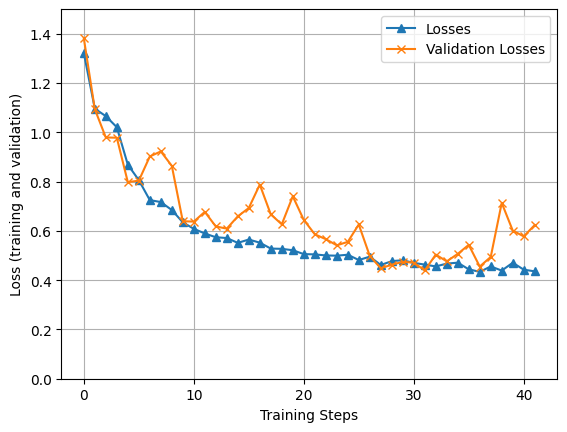

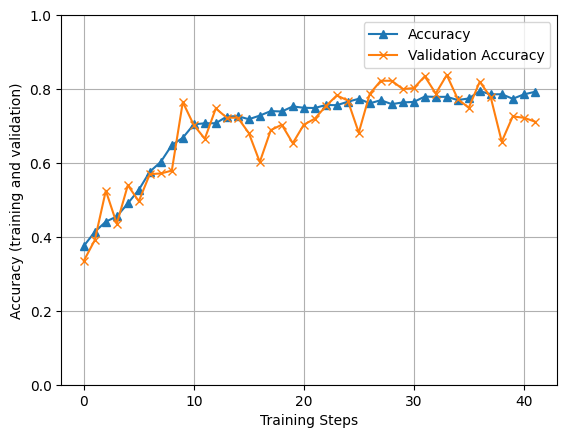

In [13]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1.5])
plt.plot(hist["loss"], label='Losses',  marker='^')
plt.plot(hist["val_loss"], label='Validation Losses', marker='x')
plt.legend()  # Mostrar leyenda
plt.grid(True)

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"], label='Accuracy', marker='^')
plt.plot(hist["val_accuracy"], label='Validation Accuracy', marker='x')
plt.legend()  # Mostrar leyenda
plt.grid(True)

# Prediccíon

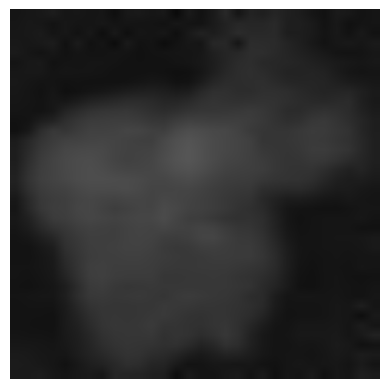

1/1 [==============================] - 1s 903ms/step
True label: Mineral
Predicted label: Biogenic_Organic


In [14]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [17]:
model.save(r'C:\Users\amand\Documents\Natali\Particulas\Particulas1\model_Resnet_Finalv2')

INFO:tensorflow:Assets written to: C:\Users\amand\Documents\Natali\Particulas\Particulas1\model_Resnet_Finalv2\assets


INFO:tensorflow:Assets written to: C:\Users\amand\Documents\Natali\Particulas\Particulas1\model_Resnet_Finalv2\assets


# Datos desbalanceados

In [29]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names = ['Biogenic Organic','Metallic','Mineral','Tire wear']

test_data_dir = r'C:\Users\amand\Documents\Natali\Particulas\Particulas1\Validacion'

test_datagen = ImageDataGenerator(rescale=1.0/224)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    batch_size = 20,
    class_mode='categorical',
    shuffle=False)


predictions = model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

Found 658 images belonging to 4 classes.
33/33 [==============================] - 26s 782ms/step


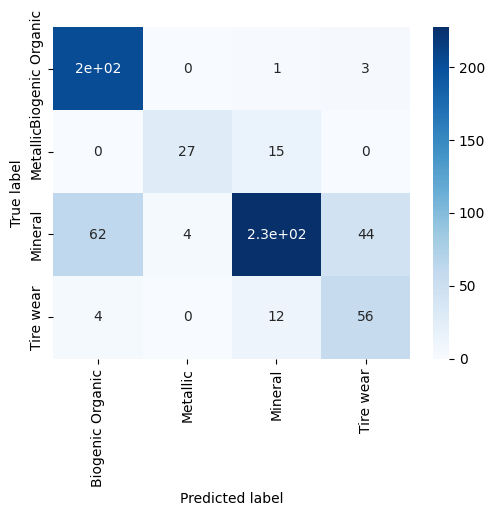

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

classes = ['Biogenic Organic','Metallic','Mineral','Tire wear']
con_mat_df = pd.DataFrame(matc,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7546    0.9807    0.8529       207
           1     0.8710    0.6429    0.7397        42
           2     0.8902    0.6736    0.7669       337
           3     0.5437    0.7778    0.6400        72

    accuracy                         0.7796       658
   macro avg     0.7649    0.7687    0.7499       658
weighted avg     0.8084    0.7796    0.7783       658



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
def plot_classification_report(y_true, y_pred, classes):
    report = classification_report(y_real, y_pred, target_names=classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(columns=['support'])
    report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()

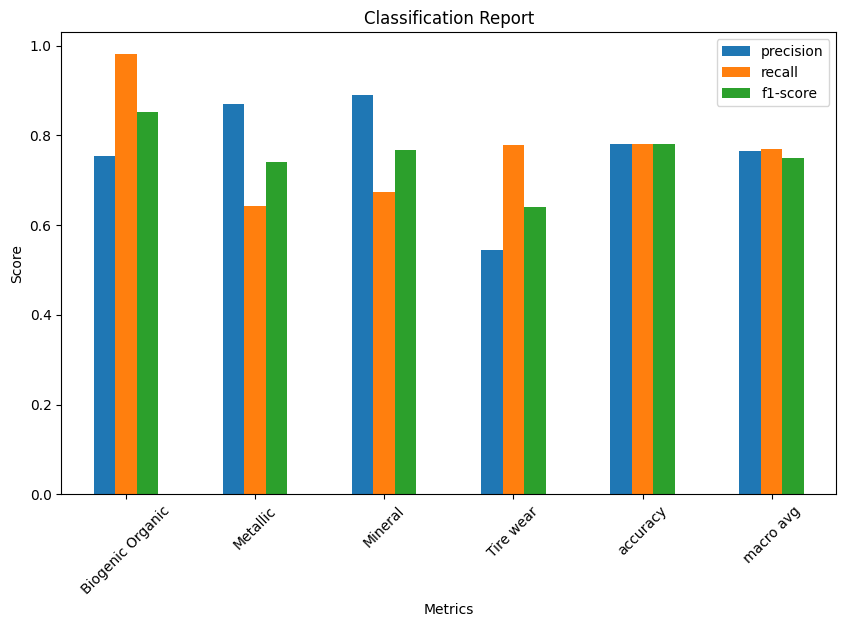

In [34]:
plot_classification_report(y_real, y_pred, classes)

In [26]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names = ['Biogenic Organic','Metallic','Mineral','Tire wear']

test_data_dir = r"C:\Users\amand\Documents\Natali\Colombia\Validacion"

test_datagen = ImageDataGenerator(rescale=1.0/240)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    batch_size = 20,
    class_mode='categorical',
    shuffle=False)


predictions = model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

Found 168 images belonging to 4 classes.
9/9 [==============================] - 12s 1s/step


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


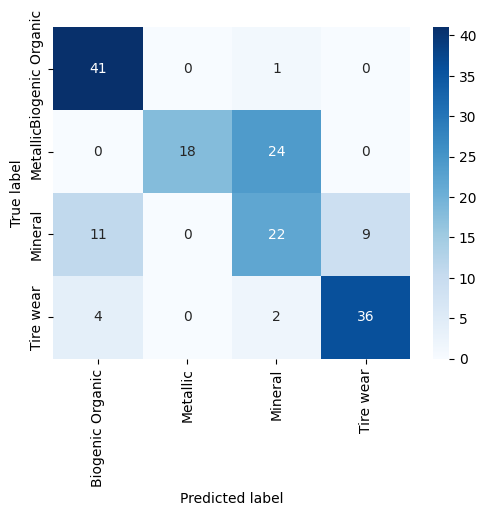

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

classes = ['Biogenic Organic','Metallic','Mineral','Tire wear']
con_mat_df = pd.DataFrame(matc,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7321    0.9762    0.8367        42
           1     1.0000    0.4286    0.6000        42
           2     0.4490    0.5238    0.4835        42
           3     0.8000    0.8571    0.8276        42

    accuracy                         0.6964       168
   macro avg     0.7453    0.6964    0.6870       168
weighted avg     0.7453    0.6964    0.6870       168



In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
def plot_classification_report(y_true, y_pred, classes):
    report = classification_report(y_real, y_pred, target_names=classes, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(columns=['support'])
    report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 6))
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()

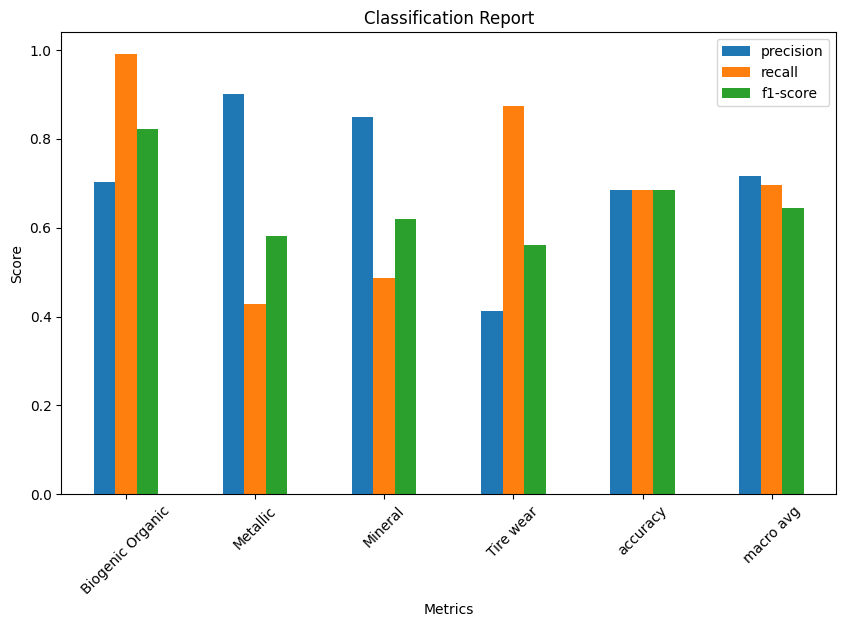

In [24]:
plot_classification_report(y_real, y_pred, classes)


In [35]:
history_df = pd.DataFrame(hist)

# Save the DataFrame to an Excel file
output_file = 'training_history_resnet.xlsx'
history_df.to_excel(output_file, index=False)

print(f"Training history has been saved to {output_file}")

Training history has been saved to training_history_resnet.xlsx
